## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

## Chapter-010-06-Evolutionary-Algorithm-03

## Part A - Load the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Part B - Setup the parameters

In [3]:
DNA_SIZE = 10            # DNA length
POP_SIZE = 100           # population size
CROSS_RATE = 0.8         # mating probability (DNA crossover)
MUTATION_RATE = 0.003    # mutation probability
N_GENERATIONS = 200
X_BOUND = [0, 5]         # x upper and lower bounds

## Part C - Requirement is to find the maximum of this function

In [4]:
def F(x): return np.sin(10*x)*x + np.cos(2*x)*x

## Part D - Find non-zero fitness for selection

In [5]:
def get_fitness(pred): return pred + 1e-3 - np.min(pred)

## Part E - Convert binary DNA to decimal and normalize it to a range(0, 5)

In [6]:
def translateDNA(pop): return pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2**DNA_SIZE-1) * X_BOUND[1]


## Part F - Select a population member

In [7]:
def select(pop, fitness):    # nature selection wrt pop's fitness
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True,
                           p=fitness/fitness.sum())
    return pop[idx]

## Part G - Cross-over between two population members

In [8]:
def crossover(parent, pop):     # mating process (genes crossover)
    if np.random.rand() < CROSS_RATE:
        i_ = np.random.randint(0, POP_SIZE, size=1)                             # select another individual from pop
        cross_points = np.random.randint(0, 2, size=DNA_SIZE).astype(np.bool)   # choose crossover points
        parent[cross_points] = pop[i_, cross_points]                            # mating and produce one child
    return parent

## Part H - Mutate a population member

In [9]:
def mutate(child):
    for point in range(DNA_SIZE):
        if np.random.rand() < MUTATION_RATE:
            child[point] = 1 if child[point] == 0 else 0
    return child

## Part I - Generate a population

In [10]:
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE))   # initialize the pop DNA

## Part J - Evolve through the generations

In [11]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

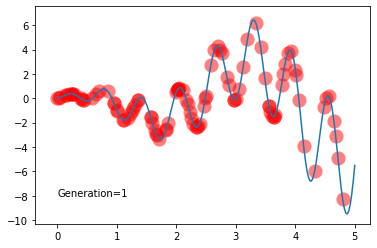

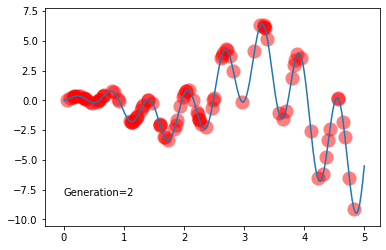

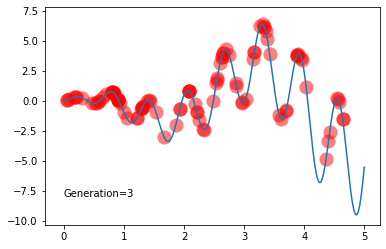

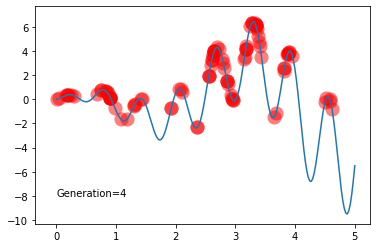

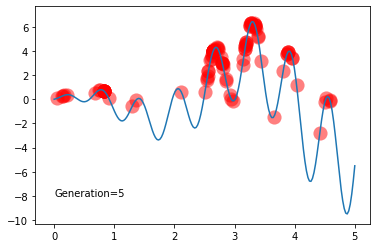

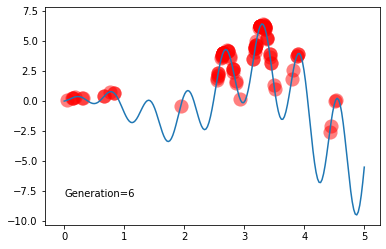

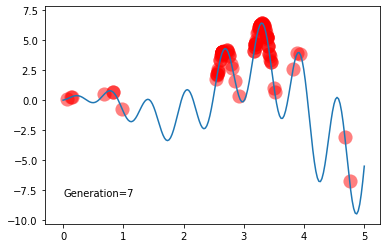

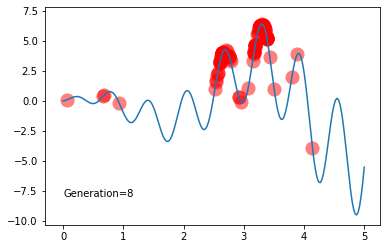

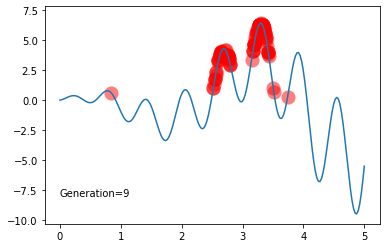

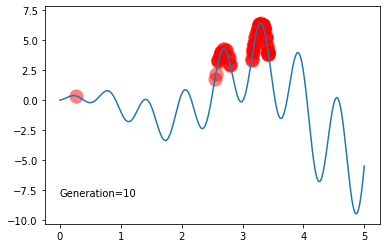

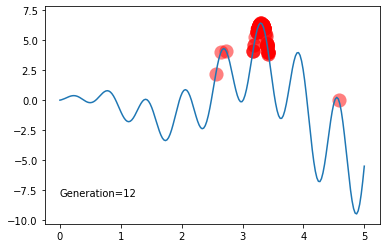

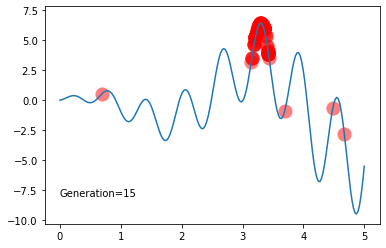

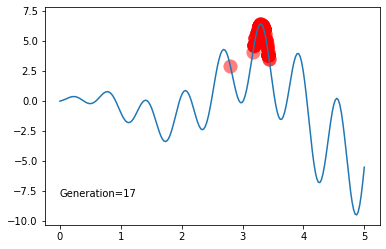

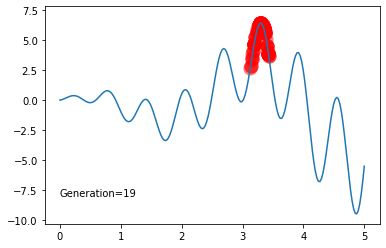

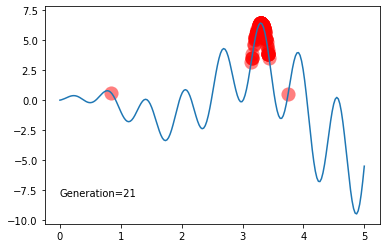

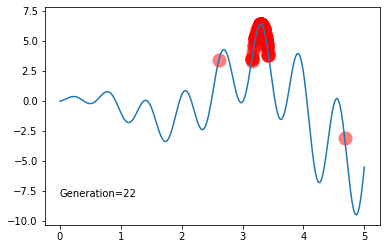

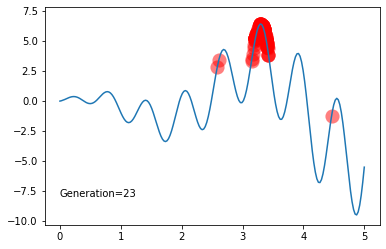

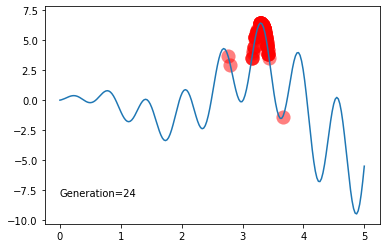

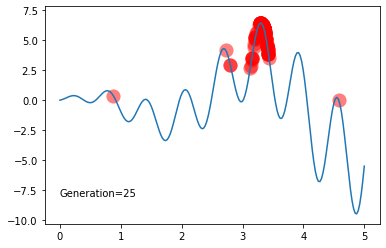

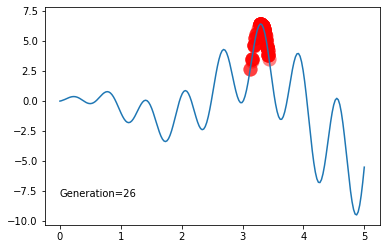

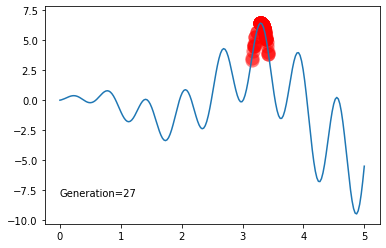

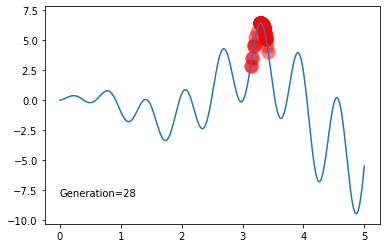

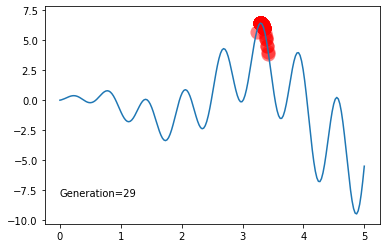

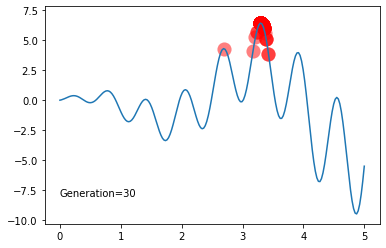

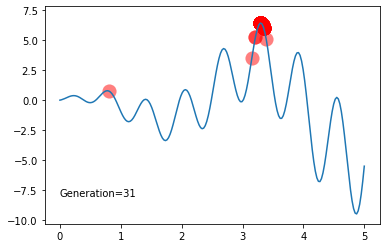

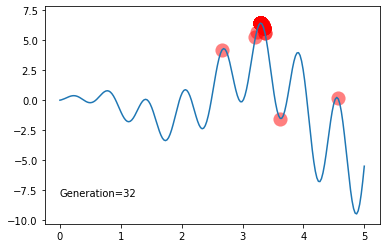

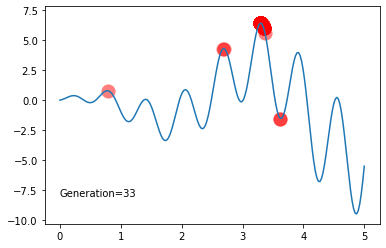

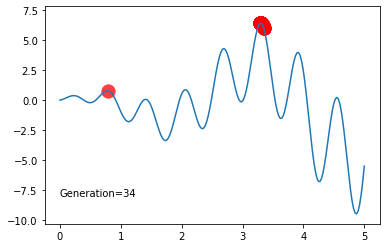

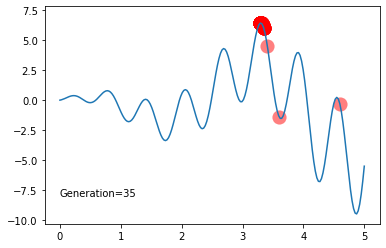

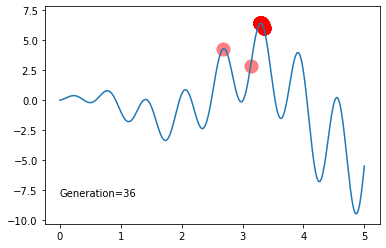

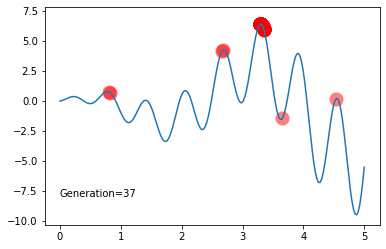

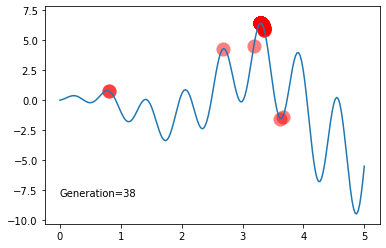

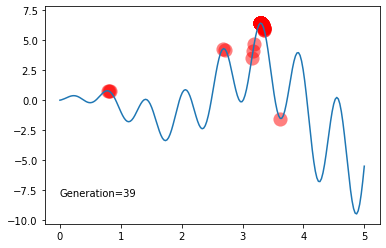

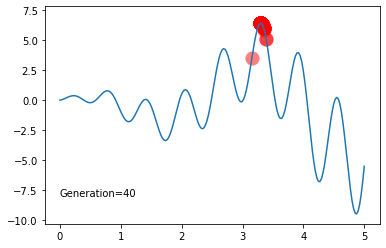

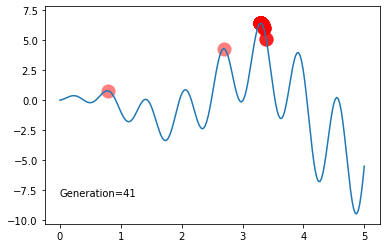

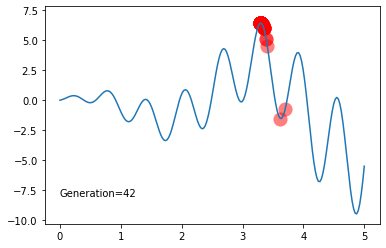

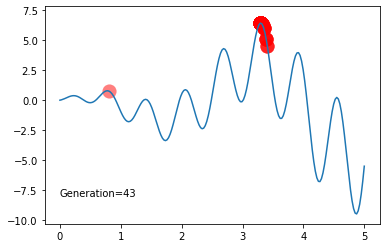

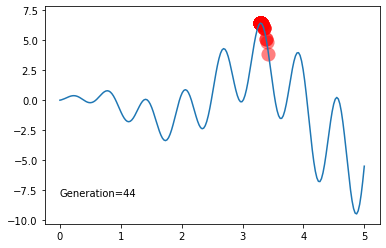

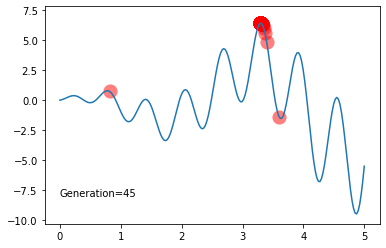

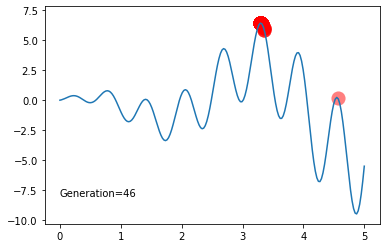

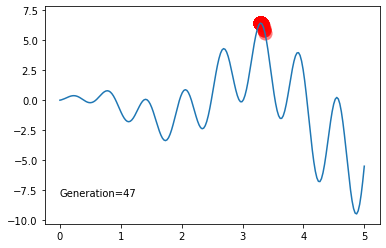

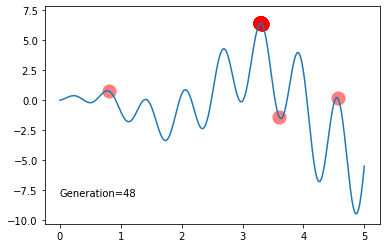

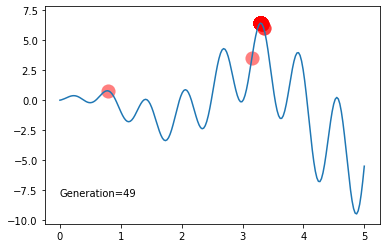

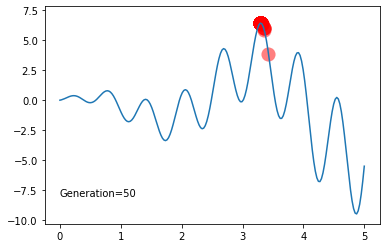

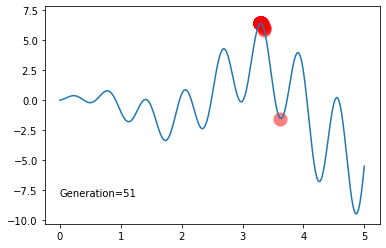

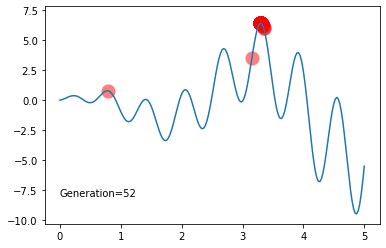

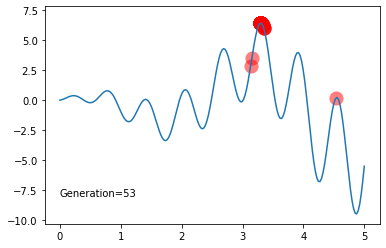

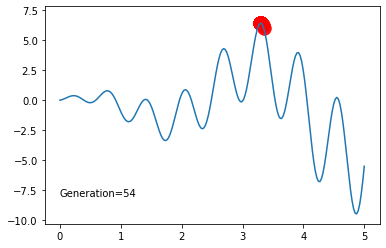

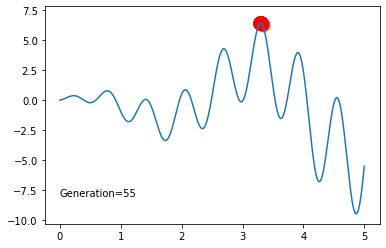

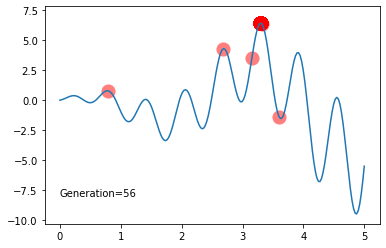

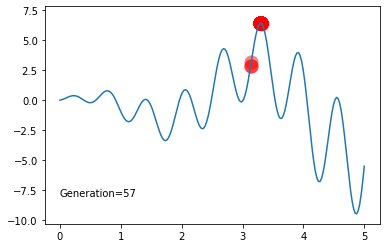

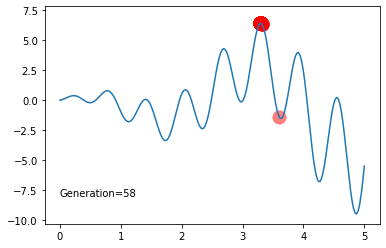

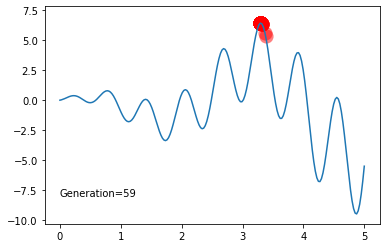

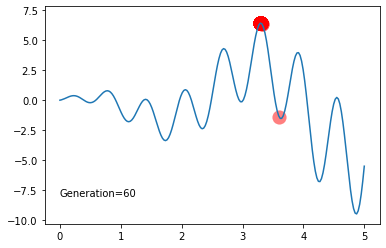

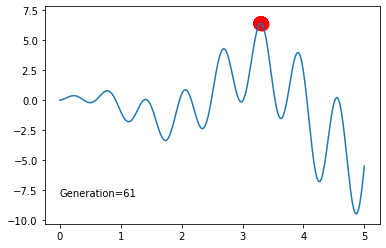

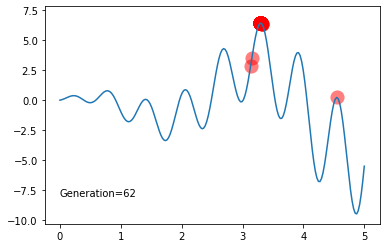

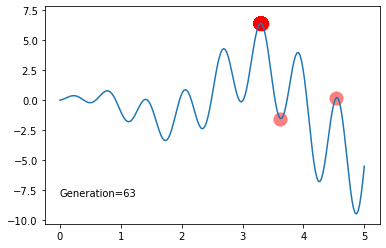

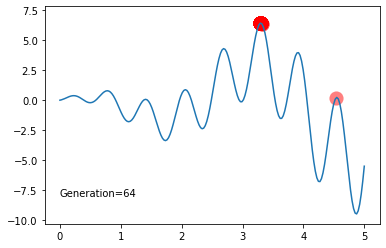

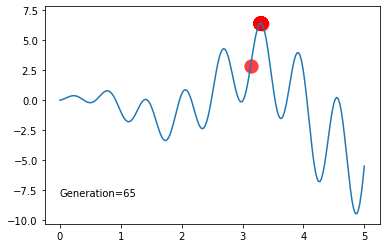

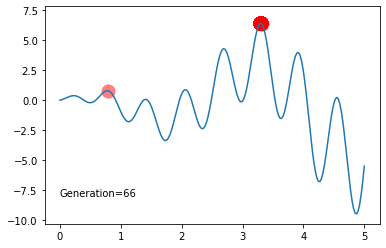

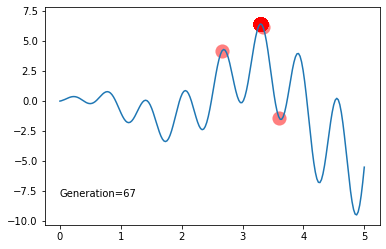

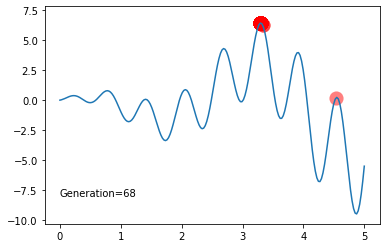

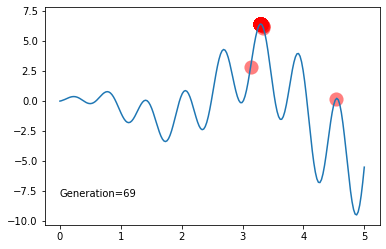

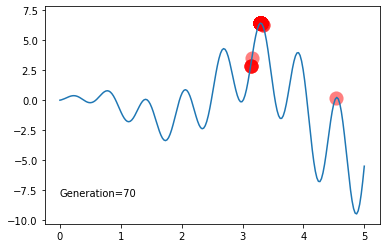

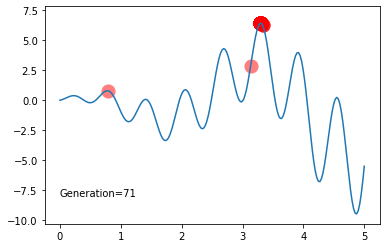

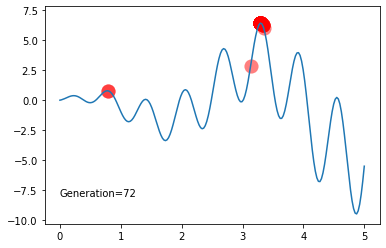

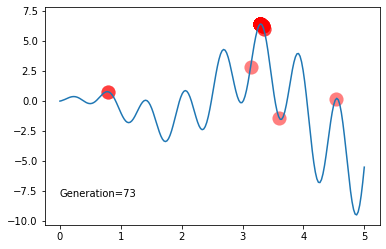

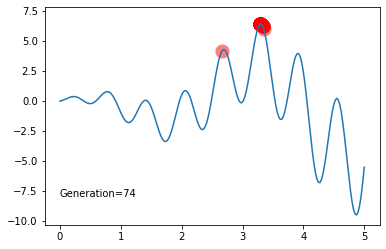

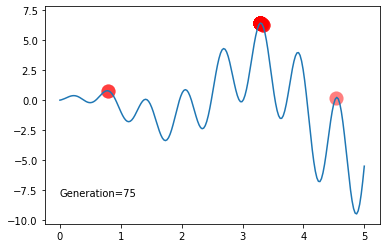

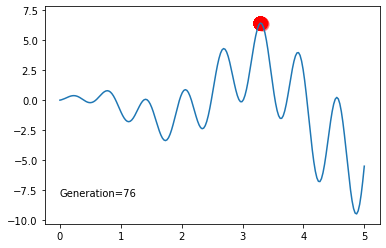

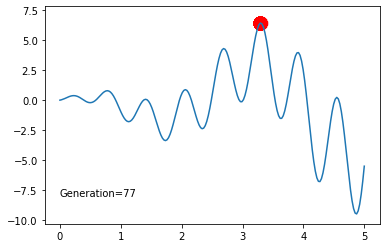

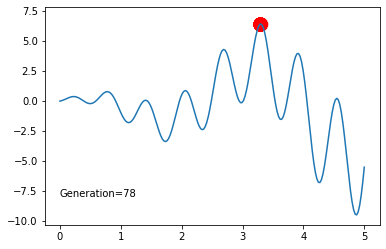

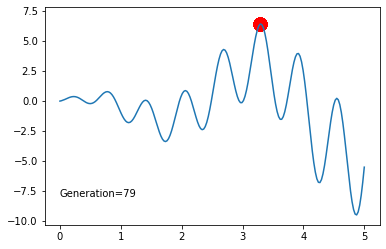

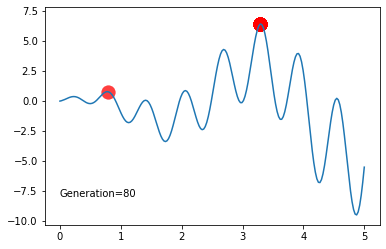

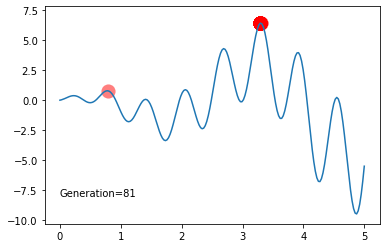

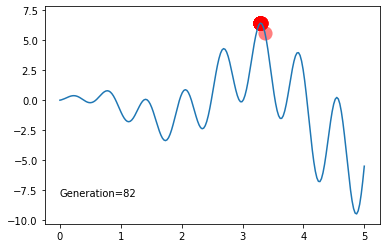

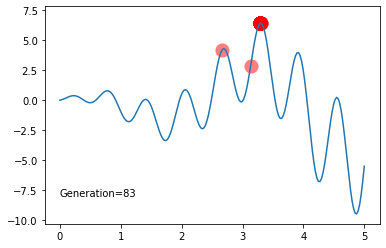

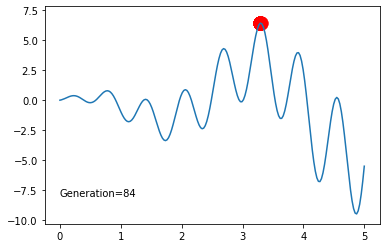

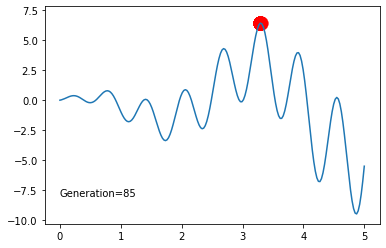

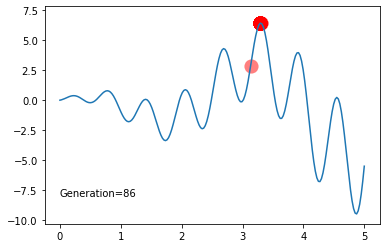

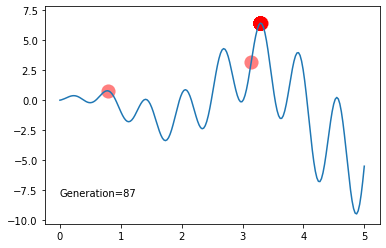

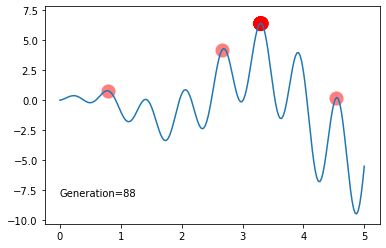

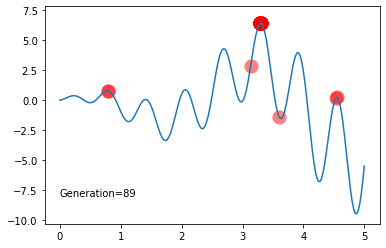

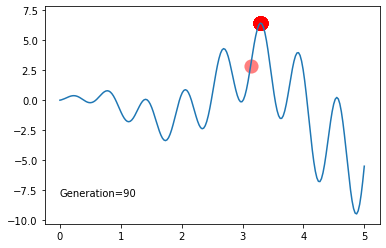

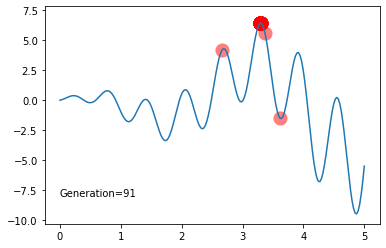

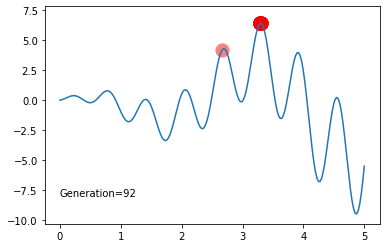

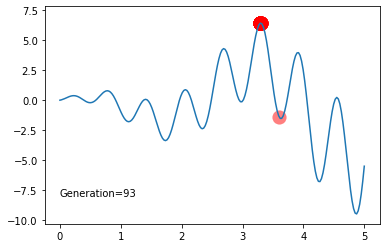

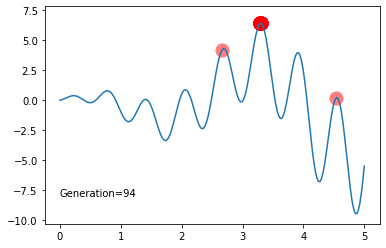

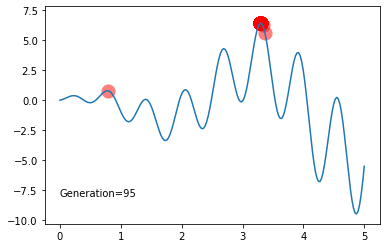

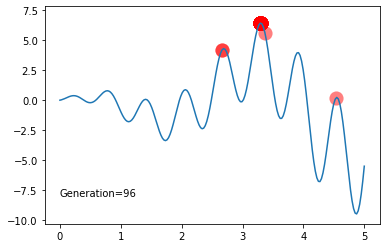

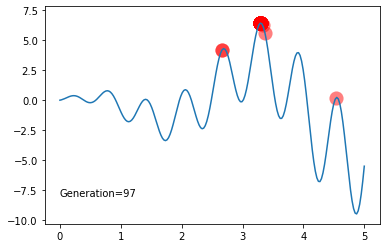

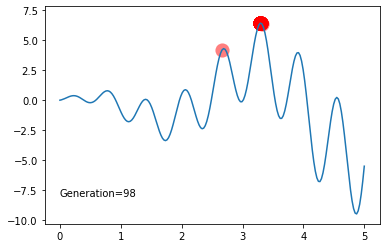

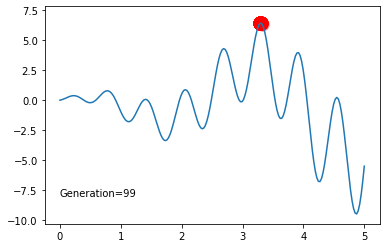

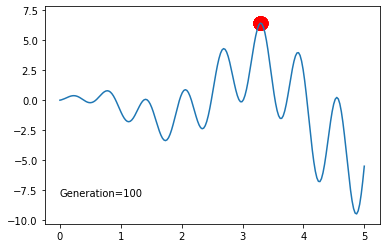

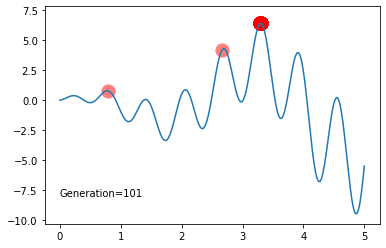

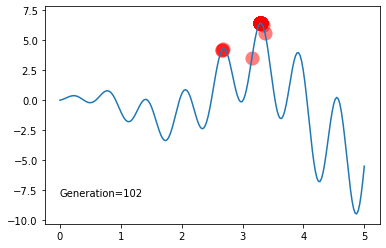

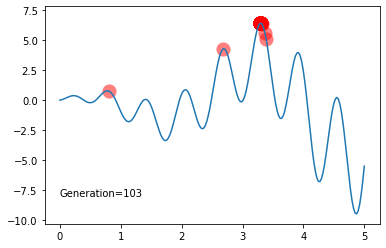

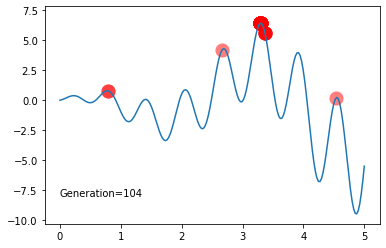

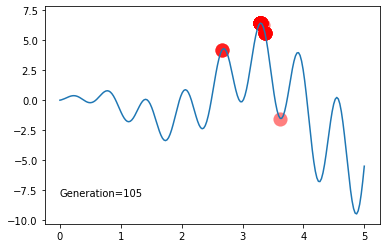

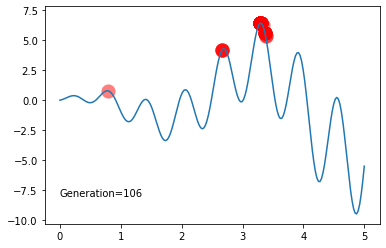

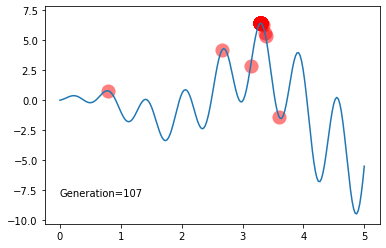

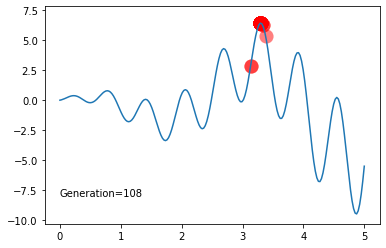

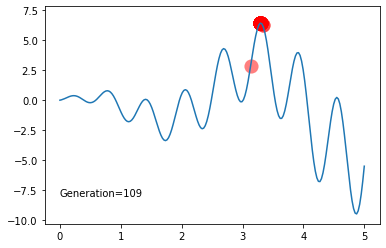

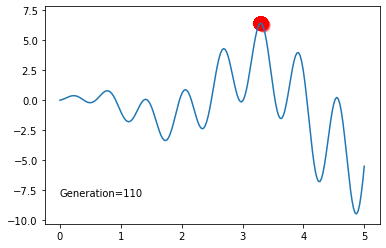

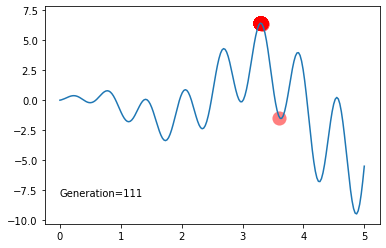

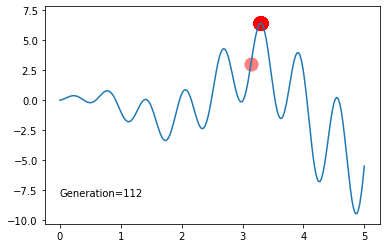

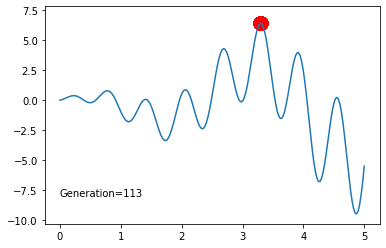

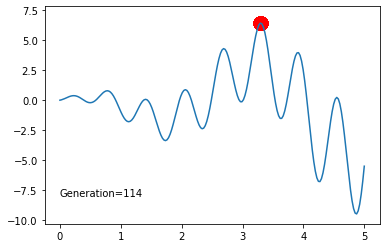

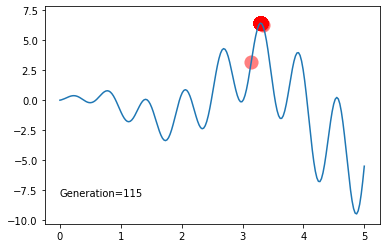

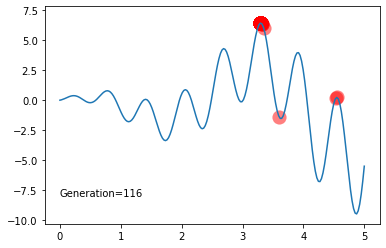

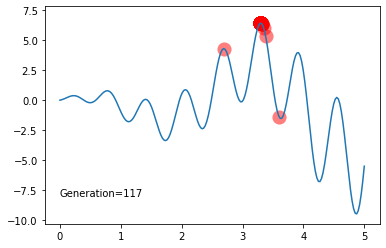

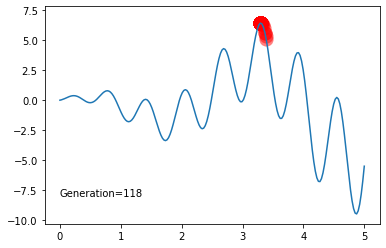

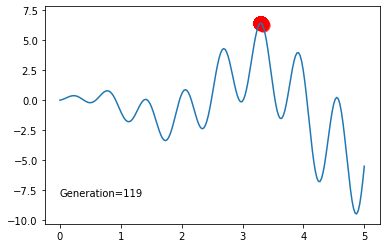

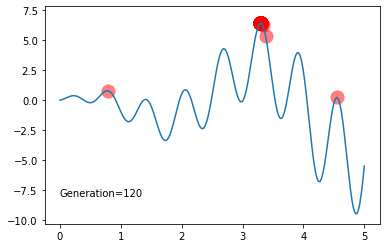

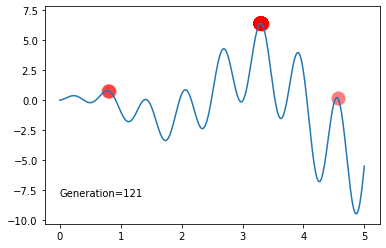

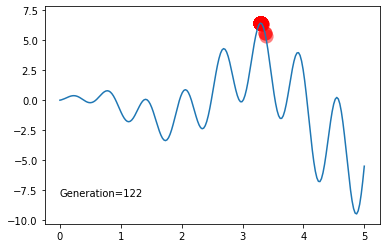

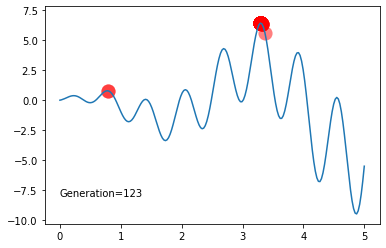

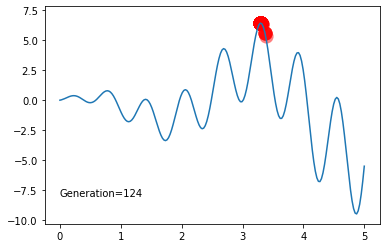

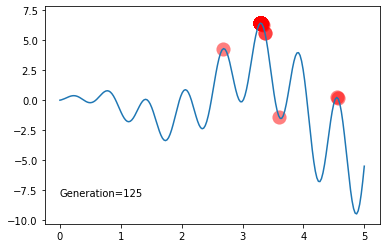

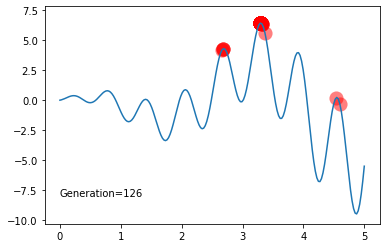

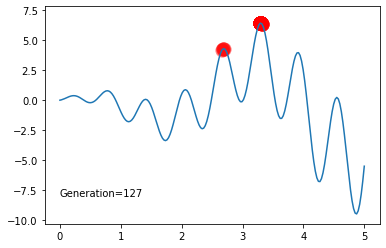

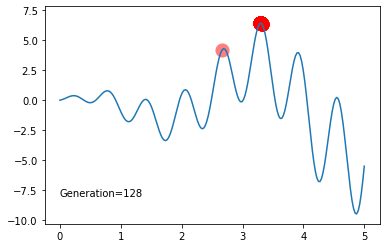

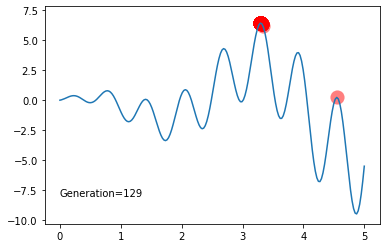

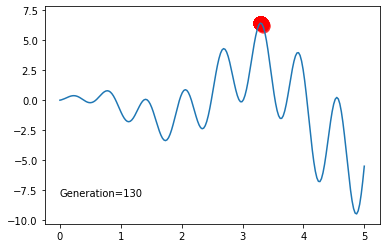

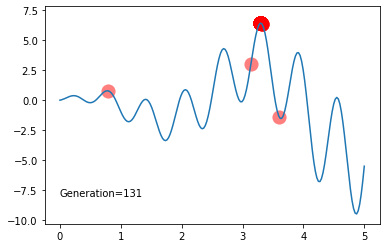

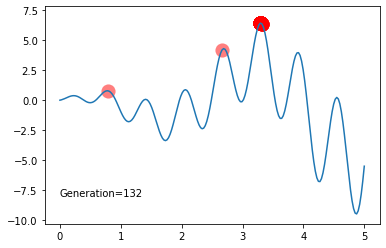

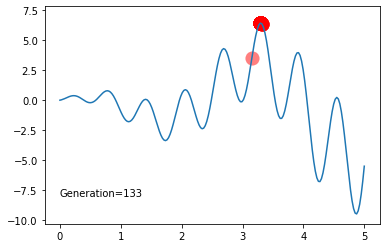

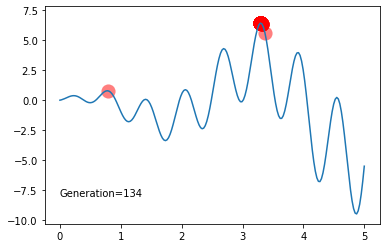

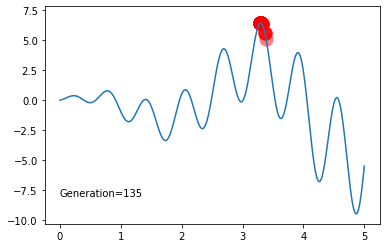

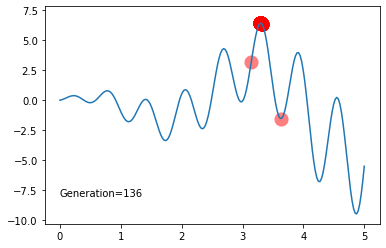

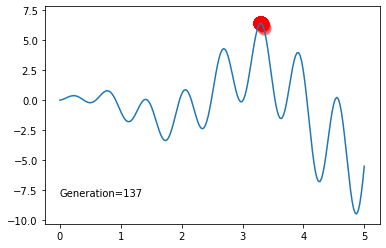

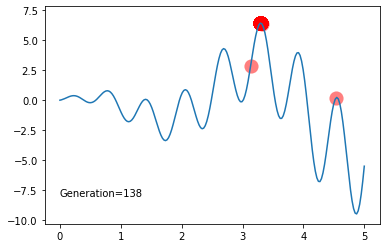

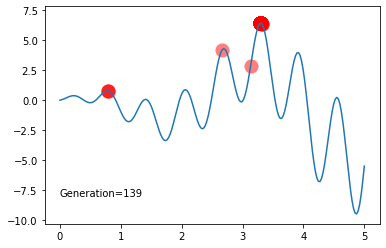

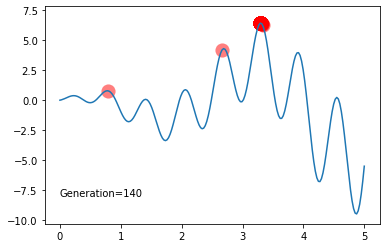

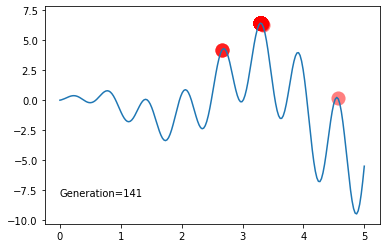

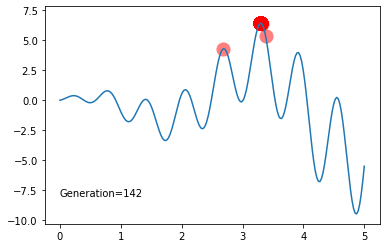

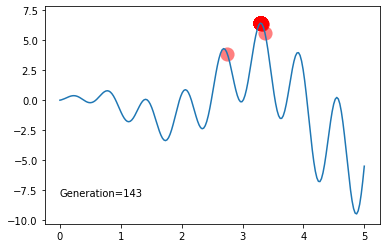

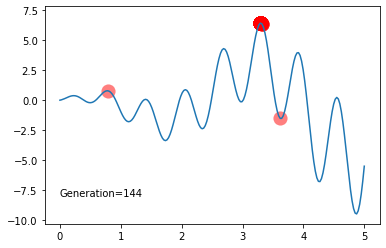

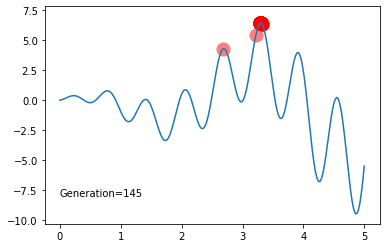

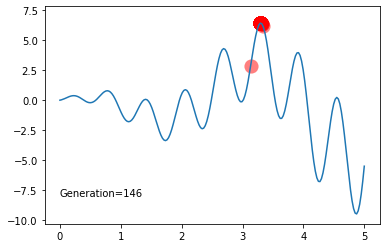

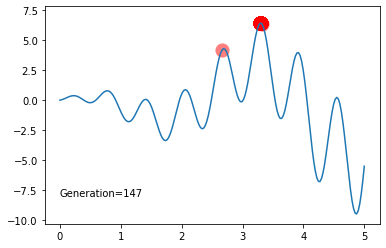

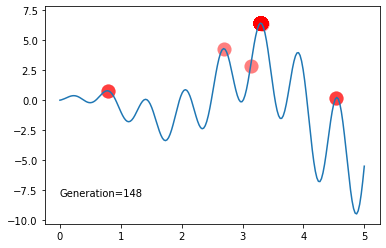

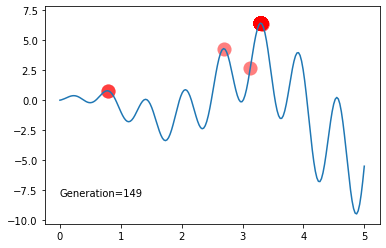

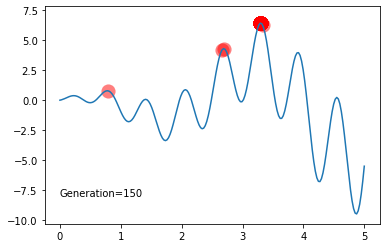

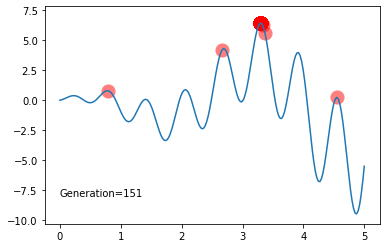

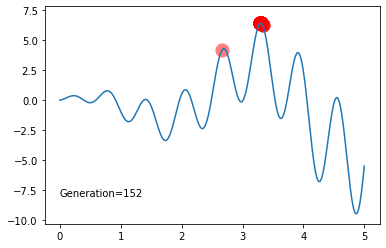

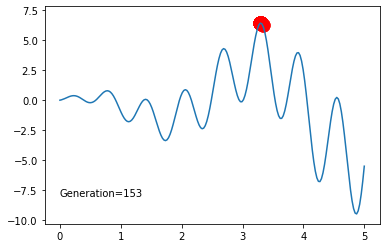

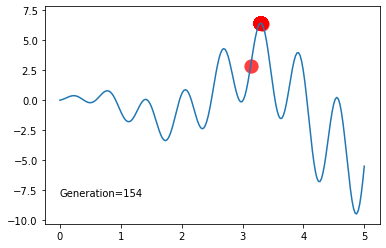

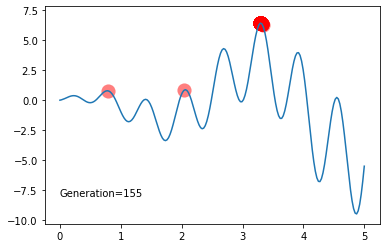

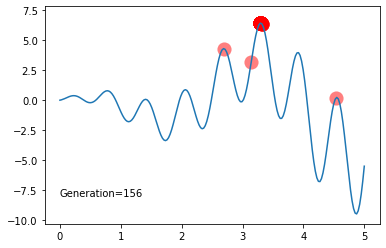

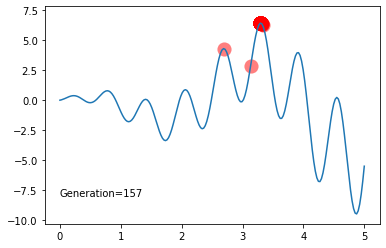

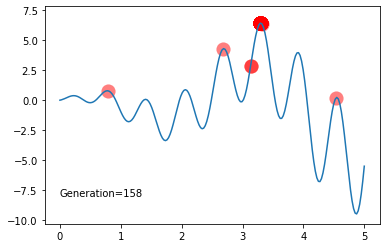

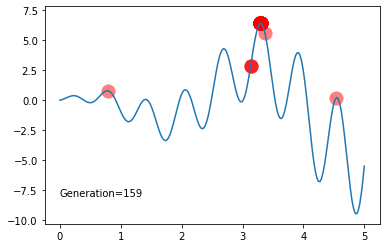

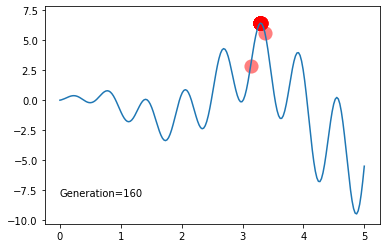

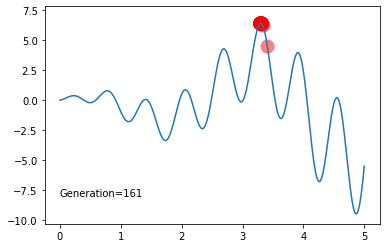

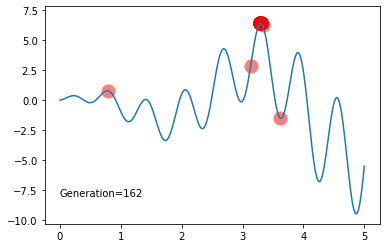

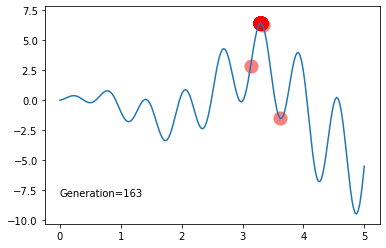

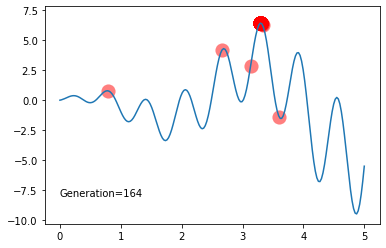

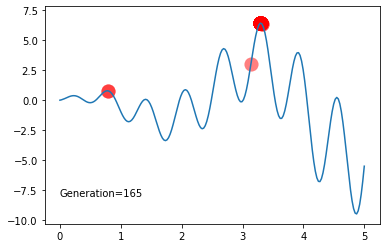

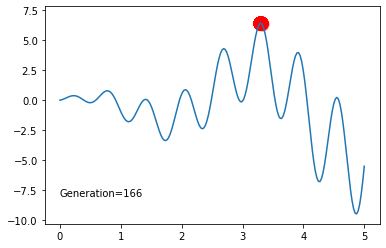

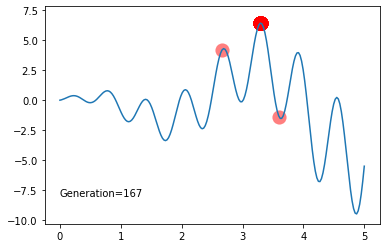

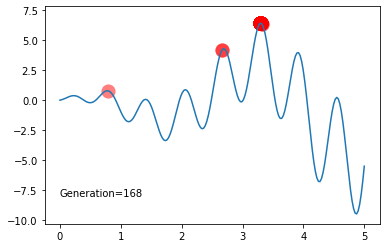

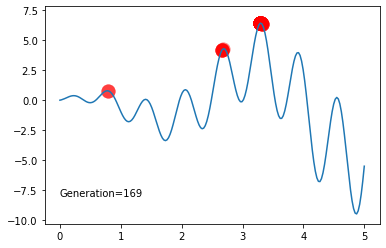

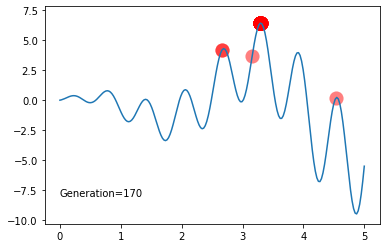

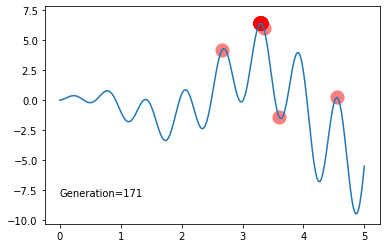

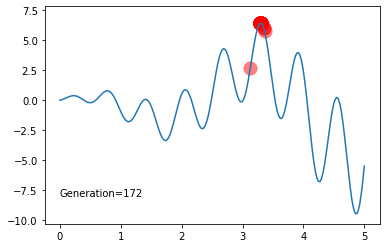

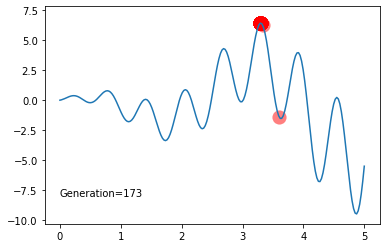

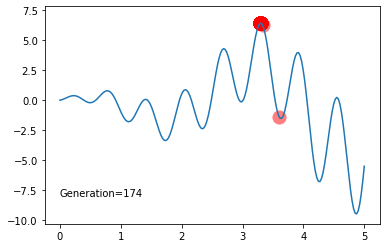

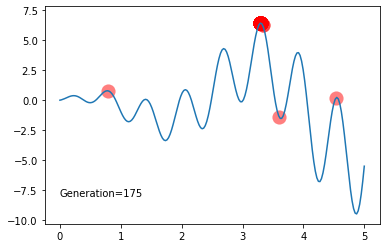

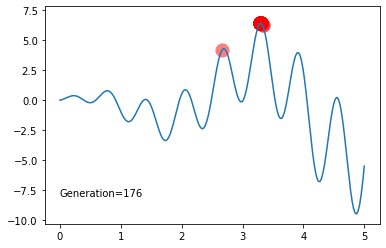

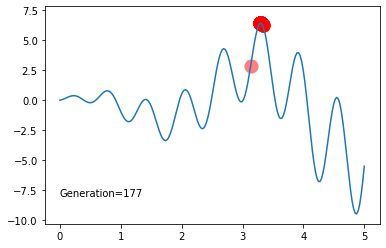

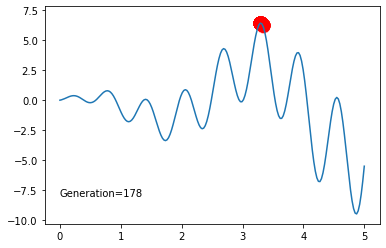

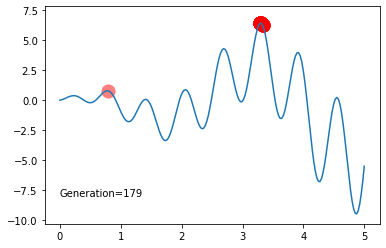

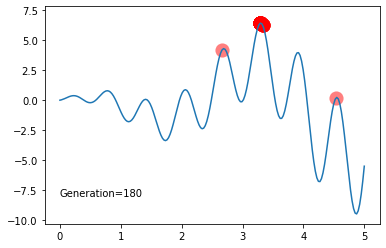

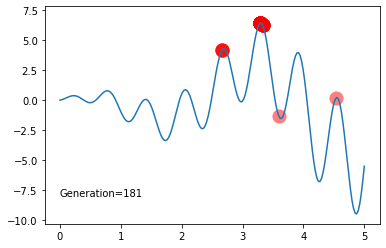

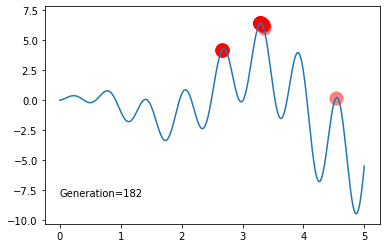

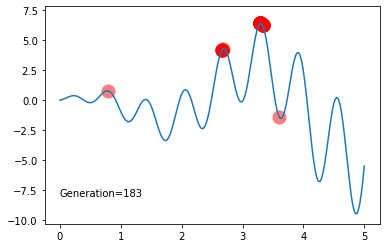

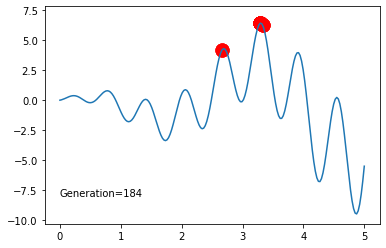

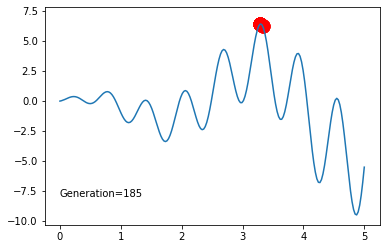

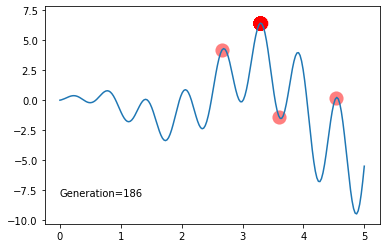

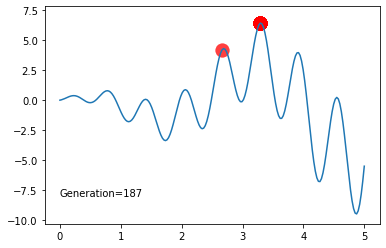

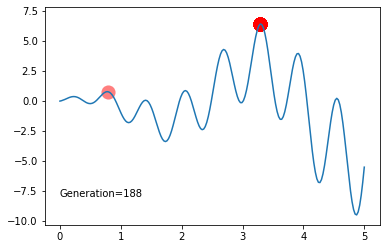

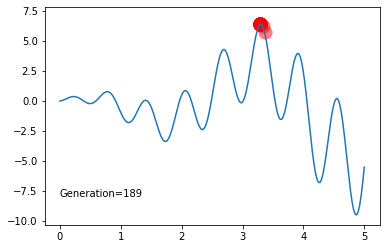

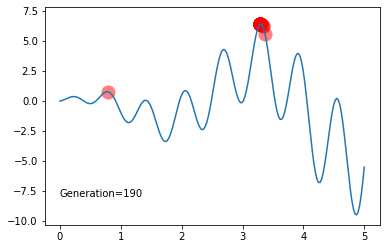

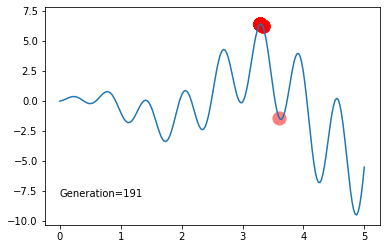

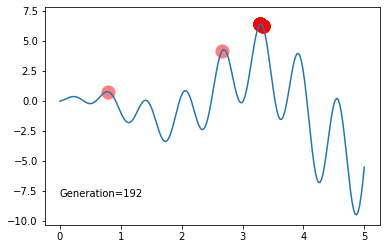

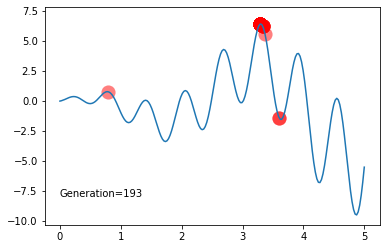

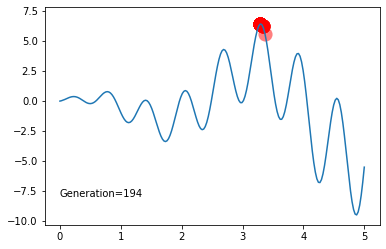

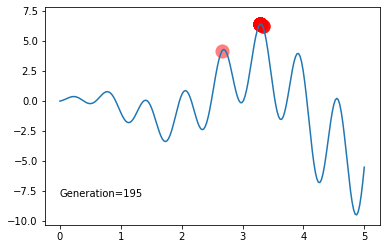

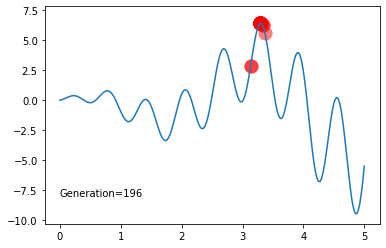

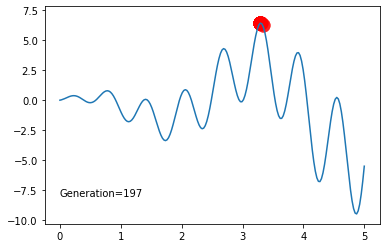

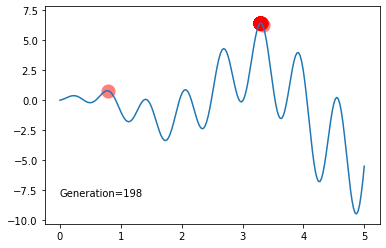

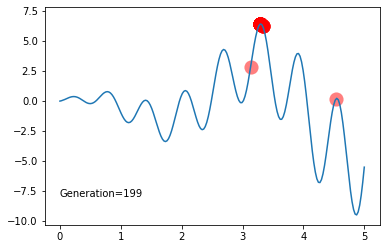

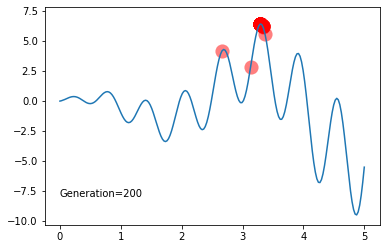

In [12]:
%matplotlib inline
plt.ion()       # something about plotting
x = np.linspace(*X_BOUND, 200)

for g in range(N_GENERATIONS):
    F_key = translateDNA(pop)
    F_values = F(F_key)    # compute function value by extracting DNA 
    plt.plot(x, F(x))
    plt.scatter(F_key, F_values, s=200, lw=0, c='red', alpha=0.5)
    plt.text(0, -8, 'Generation=%.0f' % (g+1))
    plt.pause(0.05)

    # GA part (evolution)
    fitness = get_fitness(F_values)
    pop = select(pop, fitness)
    pop_copy = pop.copy()
    for parent in pop:
        child = crossover(parent, pop_copy)
        child = mutate(child)
        parent[:] = child       # parent is replaced by its child

plt.ioff()
plt.show()

## Done

In [13]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2020-11-27 16:17:54.195495
